# DMML exam: 2023-07-05

This dataset comes from a proof-of-concept study published in 1999. 

It showed how **new cases of cancer could be classified by gene expression monitoring**.

These data were used for a binary classification problem, i.e. to classify patients with
- **AML**: **acute myeloid leukemia** 
- **ALL**: **acute lymphoblastic leukemia**

The dataset, in its original form, has a structure similar to the following. Each row refers to a gene (only a subset is shown). Each column refers to a subject.
![img](https://www.science.org/cms/10.1126/science.286.5439.531/asset/b9384907-fd3f-4a13-94f6-1555575cb987/assets/graphic/se409791103b.jpeg)

# Instructions summary
1. Import the **training set** (file *train.csv*)
    - Set column "Gene Accession Number" as the index of the dataframe
2. Operate on the dataframe
    - **Transpose the dataframe**, so that **each row is a patient** and **each column is a gene**.
        - Expected shape [38x7129]
3. Import the ***ground-truth* labels** as reported in the 'cancer' column in the *actual.csv* file 
    - Define *y_train* as the first 38 values of the 'cancer' column
    - Define *y_test* as the remaining values of the 'cancer' column
4. Fit a **classification model** on the training set
    - Transform input data by applying PCA (targeted at keeping 2 components), after scaling 
    - Fit a DecisionTree classifier (setting the maximum depth equal to 3)
    - Analyze the classification pipeline:
        - Report the cumulative explained variance of the first two principal components
        - Produce a scatter plot of the transformed data
        - Print or plot the tree structure
5. **Inference** on the test set
    - Import the test set (file *test.csv*)
    - Operate the same cleaning/preprocessing steps carried out on the training set
    - Predict the class of the test instances
    - Report and discuss the results
6. Carry out a **classification analysis** in **cross-validation**
    - Concatenate the training set and the test set 
    - Report and discuss the results of the Decision Tree classifier (setting the maximum depth equal to 3) in the following setting (5-fold cross-validation):
        - PCA targeted at keeping 2 components
        - PCA targeted at keeping a number of components such that the amount of explained variance is greater than 50%
        - PCA targeted at keeping a number of components such that the amount of explained variance is greater than 90%
        - Original space

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the training set (file *train.csv*)
- Set column "Gene Accession Number" as the index of the dataframe

In [1]:
# TODO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('train.csv', index_col='Gene Accession Number')
df

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,...,2,-95,49,-37,-70,-50,-57,136,124,-1
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,...,193,312,230,330,337,101,132,318,325,392
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X83863_at,793,782,1138,627,250,645,1140,1799,758,570,...,279,737,588,1170,2315,834,752,1293,1733,1567
Z17240_at,329,295,777,170,314,341,482,446,385,359,...,51,227,361,284,250,557,295,342,304,627
L49218_f_at,36,11,41,-50,14,26,10,59,115,9,...,6,-9,-26,39,-12,-12,28,26,12,21


In [3]:
df.shape

(7129, 38)

# 2. Operate on the dataframe
- Transpose the dataframe, so that each row is a patient and each column is a gene.
    - Expected shape [38x7129]



In [4]:
# TODO
df.shape

(7129, 38)

In [5]:
df_t=df.T

In [6]:
df_t.shape

(38, 7129)

In [7]:
df_t.isna().any()

Gene Accession Number
AFFX-BioB-5_at    False
AFFX-BioB-M_at    False
AFFX-BioB-3_at    False
AFFX-BioC-5_at    False
AFFX-BioC-3_at    False
                  ...  
X83863_at         False
Z17240_at         False
L49218_f_at       False
M71243_f_at       False
Z78285_f_at       False
Length: 7129, dtype: bool

In [8]:
df_t.isna().sum(axis=0)

Gene Accession Number
AFFX-BioB-5_at    0
AFFX-BioB-M_at    0
AFFX-BioB-3_at    0
AFFX-BioC-5_at    0
AFFX-BioC-3_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 7129, dtype: int64

In this dataset there are no missing values

In [9]:
df_t.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


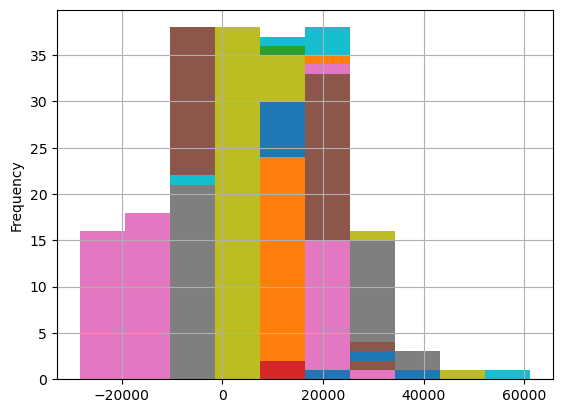

In [10]:
df_t.plot(kind='hist', bins=10, grid=True, legend=False)
plt.show()

In [11]:
df_t.corr()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,1.000000,0.404485,0.125840,0.106268,0.292728,0.312720,-0.112114,0.130446,-0.080512,0.209032,...,-0.166077,-0.176691,-0.180565,0.065664,-0.070502,-0.280454,-0.445383,-0.122253,0.234475,-0.055214
AFFX-BioB-M_at,0.404485,1.000000,0.111541,0.211543,0.213577,0.221100,-0.148462,-0.062581,-0.251531,0.073241,...,-0.029406,-0.281624,-0.099516,0.020254,0.192599,-0.134782,-0.269702,-0.204126,0.204805,-0.243125
AFFX-BioB-3_at,0.125840,0.111541,1.000000,-0.132363,-0.123053,-0.103113,0.190200,-0.015622,-0.291823,0.229361,...,-0.124097,0.214552,-0.062450,-0.032838,-0.384115,0.096754,-0.122109,-0.168626,0.131645,-0.079161
AFFX-BioC-5_at,0.106268,0.211543,-0.132363,1.000000,0.109900,0.147325,-0.042219,-0.123357,0.017261,0.309857,...,0.226762,0.257377,0.013015,-0.006088,0.263140,0.375168,0.165194,0.183427,0.343759,0.046538
AFFX-BioC-3_at,0.292728,0.213577,-0.123053,0.109900,1.000000,0.743706,0.173812,0.591401,-0.380414,0.127128,...,0.051306,-0.117290,0.066086,0.220162,0.003052,-0.568202,-0.506477,-0.067479,-0.153342,0.134453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X83863_at,-0.280454,-0.134782,0.096754,0.375168,-0.568202,-0.513490,-0.116195,-0.578092,0.208685,0.167558,...,0.262686,0.290834,-0.212324,-0.021366,0.074447,1.000000,0.433976,0.221265,0.402948,0.128952
Z17240_at,-0.445383,-0.269702,-0.122109,0.165194,-0.506477,-0.434168,0.051697,-0.269079,0.332954,0.042989,...,0.121976,0.533258,0.105215,-0.193335,0.042763,0.433976,1.000000,0.331500,0.020868,-0.084576
L49218_f_at,-0.122253,-0.204126,-0.168626,0.183427,-0.067479,-0.163090,-0.120601,0.017221,0.016795,0.148048,...,0.236923,0.253299,-0.194681,-0.178949,0.209719,0.221265,0.331500,1.000000,0.002299,-0.068414


In [ ]:
plt.figure(figsize= (20, 10))
sns.heatmap(df_t.corr(), annot = True, vmin=-1, vmax=1,cmap = "coolwarm")

they are all highly correlated

# 3. Import the *ground-truth* labels as reported in the 'cancer' column in the *actual.csv* file 
- Define *y_train* as the first 38 values of the 'cancer' column
- Define *y_test* as the remaining values of the 'cancer' array

In [ ]:
# TODO
df_act= pd.read_csv('actual.csv')
df_act

In [ ]:
y_train= df_act['cancer'][0:38]
y_test= df_act['cancer'][38:72]

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
ylist= [y_train, y_test]
y= pd.concat(ylist)
y

# 4. Fit a classification model on the training set
- Transform input data by applying PCA (targeted at keeping 2 components), after scaling 
- Fit a DecisionTree classifier (setting the maximum depth equal to 3)
- Analyze the classification pipeline:
    - Report the cumulative explained variance of the first two principal components
    - Produce a scatter plot of the transformed data
    - Print or plot the tree structure

In [ ]:
# TODO
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X, y= df_t, y
X_train, X_test= train_test_split(X, random_state=123, test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
X_test.T.shape

In [ ]:
print(f'training shape: {X_train.shape}')
print(f'training shape: {y_train.shape} ')
print(f'test shape: {X_test.shape} ')
print(f'test shape: {y_test.shape}')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_tr= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
pca= PCA(n_components=2)
X_train_reduced= pca.fit_transform(X_tr)

X_test_reduced= pca.transform(X_test)
print('Reduced dataset shape:', X_train_reduced.shape)

In [ ]:
pca.components_

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

In [ ]:
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c='red', cmap='Paired')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.show()
plt.scatter?

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X_train_reduced),alpha = 1,figsize = (10,10))
plt.show()

In [ ]:
import plotly.express as px
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

the first principal component explains a little less than 90% of the total variance of the dataset

In [ ]:
X_t= pd.DataFrame(X_train_reduced)
X_t

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=  DecisionTreeClassifier(random_state=123, max_depth=3)
dt.fit(X_t, y_train)

In [ ]:
X_train_reduced

In [ ]:
if X_train_reduced.shape[0] == y_train.shape[0]:
    # Initialize and fit the Decision Tree model
    dt = DecisionTreeClassifier(random_state=123, max_depth=3)
    dt.fit(X_train_reduced, y_train)
    print("Model training successful")
else:
    print(f"Mismatch between the number of samples in X_train_reduced ({X_train_reduced.shape[0]}) and y_train ({y_train.shape[0]})")

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize= (20,20))
plot_tree(dt, fontsize=12, feature_names=X_train_reduced.columns)
plt.show()

In [ ]:
pd.Series(dt.feature_importances_, index=X_train_reduced.columns).plot(kind = 'bar',title = 'Feature importances')
plt.show()

In [ ]:
from sklearn.tree import export_text
r = export_text(dt, feature_names = X_train_reduced.columns)
print(r)

# 5. Inference
- Import the test set (file *test.csv*)
- Operate the same cleaning/preprocessing steps carried out on the training set
- Predict the class of the test instances
- Report and discuss the results

In [ ]:
# TODO

# 6. Carry out a **classification analysis**  in cross-validation
- Concatenate the training set and the test set 
- Report and discuss the results of the Decision Tree classifier (setting the maximum depth equal to 3) in the following setting (5-fold cross-validation):
    - PCA targeted at keeping 2 components
    - PCA targeted at keeping a number of components such that the amount of explained variance is greater than 50%
    - PCA targeted at keeping a number of components such that the amount of explained variance is greater than 90%
    - Original space


In [ ]:
# TODO

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
